<a href="https://colab.research.google.com/github/cwhite911/GoogleEarthEngineGrassGIS_Demo/blob/master/GoogleEarthEngineGrassGIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Earth Engine Demo
https://developers.google.com/earth-engine/machine-learning

In [1]:
#install google earth engine
!pip install earthengine-api



     |████████████████████████████████| 153kB 9.2MB/s 
  Created wheel for earthengine-api: filename=earthengine_api-0.1.204-cp36-none-any.whl size=175146 sha256=9972cfcb8c0644541ca1a6b57cbce5aa7723f86d2ca8fff94bd4295b065fbc98
  Stored in directory: /root/.cache/pip/wheels/1c/84/12/072bd182af991b0f0b9c1599de80fa7b15179ba427106c5b17
Successfully built earthengine-api


In [2]:
# Import the Earth Engine library.
import ee

# Trigger the authentication flow.
ee.Authenticate()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/sgEwsCNVVPSC_LDd2mYbnRT0X4G_aU50G0fmms2GxNG5qJwi9AQ3m60

Successfully saved authorization token.


## Calculate elevation of Mt. Everest

In [3]:
# Initialize the library.
ee.Initialize()

# Print the elevation of Mount Everest.
dem = ee.Image('USGS/SRTMGL1_003')
xy = ee.Geometry.Point([86.9250, 27.9881])
elev = dem.sample(xy, 30).first().get('elevation').getInfo()
print('Mount Everest elevation (m):', elev)

Mount Everest elevation (m): 8729


## Display Image from Google Earth Engine

In [4]:
# Import libraries.
import ee
from IPython.display import Image

# Initialize the Earth Engine library.
ee.Initialize()

# Display a thumbnail of a sample image asset.
Image(url=ee.Image('USGS/SRTMGL1_003').getThumbUrl({'min': 0, 'max': 3000}))

## Create Web Map from Google Earth Engine

In [5]:
# Import libraries.
import ee
import folium

# Initialize the Earth Engine library.
ee.Initialize()

# Define a method for displaying Earth Engine image tiles to folium map.
def add_ee_layer(self, eeImageObject, visParams, name):
  mapID = ee.Image(eeImageObject).getMapId(visParams)
  folium.raster_layers.TileLayer(
    tiles = "https://earthengine.googleapis.com/map/"+mapID['mapid']+
      "/{z}/{x}/{y}?token="+mapID['token'],
    attr = "Map Data © Google Earth Engine",
    name = name,
    overlay = True,
    control = True
  ).add_to(self)

# Add EE drawing method to folium.
folium.Map.add_ee_layer = add_ee_layer

# Fetch an elevation model.
dem = ee.Image('USGS/SRTMGL1_003')

# Set visualization parameters.
visParams = {'min':0, 'max':3000, 'palette':['225ea8','41b6c4','a1dab4','ffffcc']}

# Create a folium map object.
myMap = folium.Map(location=[20, 0], zoom_start=3, height=500)

# Add the elevation model to the map object.
myMap.add_ee_layer(dem, visParams, 'DEM')

# Add a layer control panel to the map.
myMap.add_child(folium.LayerControl())

# Display the map.
display(myMap)

## Plot Data from Google Earth Engine

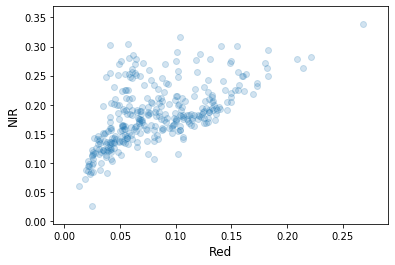

In [6]:
# Import libraries.
import ee
import matplotlib.pyplot as plt

# Initialize the Earth Engine module.
ee.Initialize()

# Fetch a Landsat image.
img = ee.Image('LANDSAT/LT05/C01/T1_SR/LT05_034033_20000913')

# Select Red and NIR bands, scale them, and sample 500 points.
sampFC = img.select(['B3','B4']).divide(10000).sample(scale=30, numPixels=500)

# Arrange the sample as a list of lists.
sampDict = sampFC.reduceColumns(ee.Reducer.toList().repeat(2), ['B3', 'B4'])
sampList = ee.List(sampDict.get('list'))

# Save server-side ee.List as a client-side Python list.
sampData = sampList.getInfo()

# Display a scatter plot of Red-NIR sample pairs using matplotlib.
plt.scatter(sampData[0], sampData[1], alpha=0.2)
plt.xlabel('Red', fontsize=12)
plt.ylabel('NIR', fontsize=12)
plt.show()

# Install GRASS GIS

In [7]:
#https://launchpad.net/~ubuntugis/+archive/ubuntu/ubuntugis-unstable
!add-apt-repository ppa:ubuntugis/ubuntugis-unstable

#update packages
!apt-get update

#install grass
!apt-get install grass -y

 Unstable releases of Ubuntu GIS packages. These releases are more bleeding edge and while generally they should work well, they dont receive the same amount of quality assurance as our stable releases do.
 More info: https://launchpad.net/~ubuntugis/+archive/ubuntu/ubuntugis-unstable
Press [ENTER] to continue or Ctrl-c to cancel adding it.

Hit:1 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:3 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:5 http://ppa.launchpad.net/ubuntugis/ubuntugis-unstable/ubuntu bionic InRelease [20.8 kB]
Get:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:9 https://developer.download.nvidia

## Prepare GRASS for use in Jupyter Notebook
Source: https://grasswiki.osgeo.org/wiki/GRASS_GIS_Jupyter_notebooks

In [8]:
#directory where GRASS GIS lives
#!find / -name grass*
!export GISBASE=`/usr/lib/grass78 --config path`   # or define path to binaries like /usr/local/grass-7.4.svn
!echo $GISBASE

# generate GISRC
# Defines the system wide value while in a GRASS session
!mkdir $HOME/grassdata
!MYGISDBASE=$HOME/grassdata # Change this path to reflect your own 
!MYLOC=GEE # Change this location name to reflect your own 
!MYMAPSET=PERMANENT

# Set the global grassrc file to individual file name
!MYGISRC="$HOME/.grassrc.$$"

!echo "GISDBASE: $MYGISDBASE" > "$MYGISRC"
!echo "LOCATION_NAME: $MYLOC" >> "$MYGISRC"
!echo "MAPSET: $MYMAPSET" >> "$MYGISRC"
!echo "GRASS_GUI: text" >> "$MYGISRC"

# path to GRASS settings file
!export GISRC=$MYGISRC

!export LD_LIBRARY_PATH=$GISBASE/lib:$LD_LIBRARY_PATH
!export PYTHONPATH=$GISBASE/etc/python:$PYTHONPATH
!export PATH=$GISBASE/bin:$GISBASE/scripts:$PATH

/bin/bash: /usr/lib/grass78: Is a directory

/bin/bash: : No such file or directory
/bin/bash: : No such file or directory
/bin/bash: : No such file or directory
/bin/bash: : No such file or directory


## Download Sample GRASS Data

In [9]:
#Download Sample Data
!wget /$HOME/grassdata/ "https://grass.osgeo.org/sampledata/north_carolina/nc_spm_08_grass7.tar.gz"
!tar xvzf nc_spm_08_grass7.tar.gz
!mv /content/nc_spm_08_grass7 /root/grassdata/
!chown -R root:root /root/grassdata/nc_spm_08_grass7/ #TODO: Read up on how colab is handling users becasue I'm guessing I shouldn't need to change owner to root. This data should probably also live in /content/grassdata

//root/grassdata/: Scheme missing.
--2019-10-25 23:32:10--  https://grass.osgeo.org/sampledata/north_carolina/nc_spm_08_grass7.tar.gz
Resolving grass.osgeo.org (grass.osgeo.org)... 140.211.15.3
Connecting to grass.osgeo.org (grass.osgeo.org)|140.211.15.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 147659133 (141M) [application/x-gzip]
Saving to: ‘nc_spm_08_grass7.tar.gz’

nc_spm_08_grass7.ta 100%[===================>] 140.82M  20.1MB/s    in 8.0s    

2019-10-25 23:32:19 (17.6 MB/s) - ‘nc_spm_08_grass7.tar.gz’ saved [147659133/147659133]

FINISHED --2019-10-25 23:32:19--
Total wall clock time: 8.8s
Downloaded: 1 files, 141M in 8.0s (17.6 MB/s)
nc_spm_08_grass7/
nc_spm_08_grass7/VERSION.txt
nc_spm_08_grass7/PERMANENT/
nc_spm_08_grass7/PERMANENT/cellhd/
nc_spm_08_grass7/PERMANENT/cellhd/landcover_1m
nc_spm_08_grass7/PERMANENT/cellhd/zipcodes
nc_spm_08_grass7/PERMANENT/cellhd/lsat7_2002_20
nc_spm_08_grass7/PERMANENT/cellhd/cfactorbare_1m
nc_spm_08_grass7/PERM

## Configure Python to Run GRASS
Credited to  https://github.com/wenzeslaus/try-grass-in-jupyter

In [0]:
# import Python standard library and IPython packages we need
import os
import sys
import subprocess
from IPython.display import Image

# ask GRASS GIS where its Python packages are
gisbase= "/usr/lib/grass78"
# gisbase = subprocess.check_output(["grass78", "--config", "path"]).strip()
# print(gisbase)
os.environ['GISBASE'] = gisbase

sys.path.append(os.path.join("/usr/lib/grass78", "etc", "python"))

# import GRASS GIS packages we need
import grass.script as gs
import grass.script.setup as gsetup

# create GRASS GIS session
rcfile = gsetup.init(gisbase, "/root/grassdata", "nc_spm_08_grass7", "user1")

# we want functions to raise exceptions and see standard output of the modules
gs.set_raise_on_error(True)
gs.set_capture_stderr(True)
# simply overwrite existing maps like we overwrite Python variable values
os.environ['GRASS_OVERWRITE'] = '1'
# enable map rendering to in Jupyter Notebook
os.environ['GRASS_FONT'] = 'sans'
# set display modules to render into a file (named map.png by default)
os.environ['GRASS_RENDER_IMMEDIATE'] = 'cairo'
os.environ['GRASS_RENDER_FILE_READ'] = 'TRUE'
os.environ['GRASS_LEGEND_FILE'] = 'legend.txt'


### Raster buffer
Set computational region and create multiple buffers in given distances around lakes represented as raster:

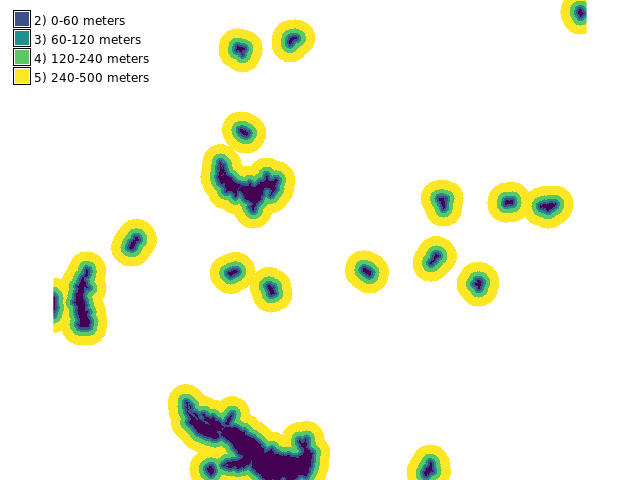

In [11]:
gs.parse_command('g.region', raster="lakes", flags='pg')
gs.run_command('r.buffer', input="lakes", output="lakes_buff", distances=[60, 120, 240, 500])
gs.run_command('d.erase')
gs.run_command('d.rast', map="lakes_buff")
gs.run_command('d.legend', raster="lakes_buff", range=(2, 5), at=(80, 100, 2, 10))
Image(filename="map.png")

### Vector buffer
Create a negative buffer around state boundary represented as a vector. Vector modules typically don't follow computational region, but we set it to inform display modules about our area of interest.

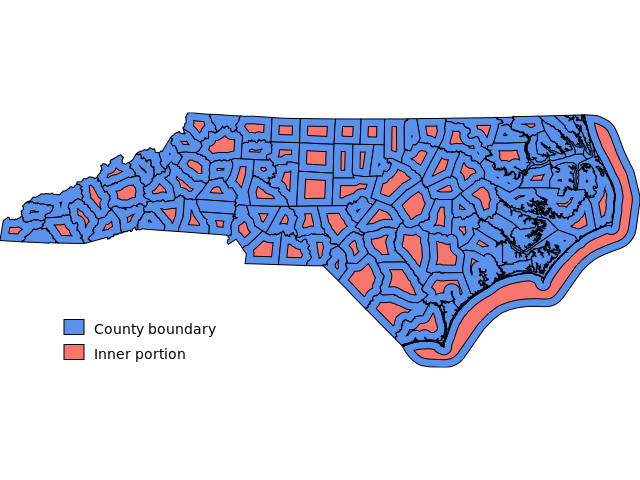

In [12]:
gs.run_command('v.buffer', input="boundary_county", output="buffer", distance=-10000)
gs.parse_command('g.region', vector="boundary_county", flags='pg')
gs.run_command('d.erase')  # erase the display before drawing again
!rm -f $GRASS_LEGEND_FILE  # and remove the legend file
gs.run_command('d.vect', map="boundary_county", fill_color="#5A91ED", legend_label="County boundary")
gs.run_command('d.vect', map="buffer", fill_color="#F8766D", legend_label="Inner portion")
gs.run_command('d.legend.vect', at=(10, 35))
Image(filename="map.png")

In [13]:
gs.parse_command('g.list', type="vector", flags="p")


{'': None,
 '----------------------------------------------': None,
 'P079214                   elev_lid792_bepts         poi_names_wake': None,
 'P079215                   elev_lid792_cont1m        precip_30ynormals': None,
 'P079218                   elev_lid792_randpts       precip_30ynormals_3d': None,
 'P079219                   elev_lidrural_mrpts       railroads': None,
 'boundary_county           elev_lidrural_mrptsft     roadsmajor': None,
 'boundary_municp           elev_ned10m_cont10m       schools_wake': None,
 'bridges                   firestations              soils_general': None,
 'buffer': None,
 'busroute1                 geodetic_pts              soils_wake': None,
 'busroute11                geodetic_swwake_pts       streams': None,
 'busroute6                 geology                   streets_wake': None,
 'busroute_a                geonames_NC               swwake_10m': None,
 'busroutesall              geonames_wake             urbanarea': None,
 'busstopsall   

# Combine Goolge Earth Eninge with GRASS

In [0]:
from google.colab import auth

auth.authenticate_user()

## Export Data from Goolge Earth Engine

In [15]:
# Import libraries.
import ee
from IPython.display import Image
import tensorflow as tf

tf.enable_eager_execution()
print(tf.__version__)

# Initialize the Earth Engine library.
ee.Initialize()

imageFilePrefix = 'grass_elev_demo_'
outputBucket = 'gee_default'
# # # Make sure the bucket exists.
# print('Found Cloud Storage bucket.' if tf.gfile.Exists('gs://' + outputBucket) 
#     else 'Output Cloud Storage bucket does not exist.')

# Specify patch and file dimensions.
imageExportFormatOptions = {
  'patchDimensions': [256, 256],
  'maxFileSize': 104857600,
  'compressed': True
}
# var dataset = 
# var elevation = dataset.select('elevation');
# elevationVis = {
#   min: 0.0,
#   max: 4000.0,
#   gamma: 1.6,
# };
dataset = ee.Image('USGS/NED')
image = dataset.select("elevation")

# Export imagery in this region.
exportRegion = ee.Geometry.Rectangle([-122.7, 37.3, -121.8, 38.00])

# Setup the task.
imageTask = ee.batch.Export.image.toCloudStorage(
  image=image,
  description='Image Export',
  fileNamePrefix=imageFilePrefix,
  bucket=outputBucket,
  scale=30,
  fileFormat='GeoTIFF',
  region=exportRegion.toGeoJSON()['coordinates']
)
imageTask.start()

1.15.0


### Check if export file exists

In [16]:
import tensorflow as tf

fileNameSuffix = '.tif'
elevationFilePath = 'gs://' + outputBucket + '/' + imageFilePrefix + fileNameSuffix

print('Found elevation file.' if tf.gfile.Exists(elevationFilePath) 
    else 'No elevation file found.')


Found elevation file.


## Download Elevation Data From GCS

In [17]:
# Download the file from a given Google Cloud Storage bucket.
!GCS_BUCKET_NAME="gee_default"
!gsutil cp gs://gee_default/grass_elev_demo_.tif /content/grass_elev_demo.tif


Copying gs://gee_default/grass_elev_demo_.tif...
\ [1 files][ 25.0 MiB/ 25.0 MiB]                                                
Operation completed over 1 objects/25.0 MiB.                                     


## Create WGS84 Location

In [18]:
!grass78 --help


GRASS GIS 7.8.0
Geographic Resources Analysis Support System (GRASS GIS).

Usage:
  grass78 [-h | --help] [-v | --version]
          [-c | -c geofile | -c EPSG:code[:datum_trans] | -c XY]
          [-e] [-f] [--text | --gtext | --gui] [--config param]
          [[[GISDBASE/]LOCATION/]MAPSET]
  grass78 [FLAG]... GISDBASE/LOCATION/MAPSET --exec EXECUTABLE [EPARAM]...
  grass78 --tmp-location [geofile | EPSG | XY] --exec EXECUTABLE [EPARAM]...

Flags:
  -h or --help                   print this help message
  -v or --version                show version information and exit
  -c                             create given database, location or mapset if it doesn't exist
  -e                             exit after creation of location or mapset. Only with -c flag
  -f                             force removal of .gislock if exists (use with care!). Only with --text flag
  --text                         use text based interface (skip graphical welcome screen)
                                   

In [19]:
!grass78 -c epsg:3857 /root/grassdata/google_earth_engine_3857 -e


Starting GRASS GIS...
Creating new GRASS GIS location <google_earth_engine_3857>...
Cleaning up temporary files...
Cleaning up temporary files...


## Use elevation file with GRASS GIS

In [0]:
# import GRASS GIS packages we need
import grass.script as gs
import grass.script.setup as gsetup

# create GRASS GIS session
rcfile = gsetup.init(gisbase, "/root/grassdata", "google_earth_engine_3857", "PERMANENT")

# we want functions to raise exceptions and see standard output of the modules
gs.set_raise_on_error(True)
gs.set_capture_stderr(True)
# simply overwrite existing maps like we overwrite Python variable values
os.environ['GRASS_OVERWRITE'] = '1'
# enable map rendering to in Jupyter Notebook
os.environ['GRASS_FONT'] = 'sans'
# set display modules to render into a file (named map.png by default)
os.environ['GRASS_RENDER_IMMEDIATE'] = 'cairo'
os.environ['GRASS_RENDER_FILE_READ'] = 'TRUE'
os.environ['GRASS_LEGEND_FILE'] = 'legend.txt'




Link elevation data from GEE to GRASS

In [21]:
gs.parse_command('r.external', input="grass_elev_demo.tif", output="usgs_ned", flags="o")

{}

Calculate Watershed and streams
https://grasswiki.osgeo.org/wiki/From_GRASS_GIS_novice_to_power_user_(workshop_at_FOSS4G_Boston_2017)

In [22]:

gs.parse_command('g.list', type="all", flags="p")
gs.parse_command('g.region', raster="usgs_ned", flags='pg')
#r.watershed elevation=elevation accumulation=flowacc drainage=drainage stream=streams threshold=10?0000
gs.run_command('r.watershed', elevation="usgs_ned", accumulation="flowacc", drainage="drainage", stream="streams", threshold=100000)
#r.to.vect input=streams output=streams type=line
gs.run_command('r.to.vect', input="streams", output="streams", type="line")


0

Install SVN to download GRASS GIS extensions

In [23]:
!apt-get install subversion


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libarmadillo8 libarpack2 libsuperlu5
Use 'apt autoremove' to remove them.
The following additional packages will be installed:
  libapr1 libaprutil1 libserf-1-1 libsvn1
Suggested packages:
  db5.3-util libapache2-mod-svn subversion-tools
The following NEW packages will be installed:
  libapr1 libaprutil1 libserf-1-1 libsvn1 subversion
0 upgraded, 5 newly installed, 0 to remove and 34 not upgraded.
Need to get 2,237 kB of archives.
After this operation, 9,910 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libapr1 amd64 1.6.3-2 [90.9 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libaprutil1 amd64 1.6.1-2 [84.4 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libserf-1-1 amd64 1.3.9-6 [44.4 kB]
Get:4 http://archive.ubuntu.com/ubuntu

Install grass-dev to install GRASS extensions in linux
https://grass.osgeo.org/grass72/manuals/g.extension.html#error:-please-install-grass-development-package

In [24]:
!apt-get install grass-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libgeos-3.6.2 libproj12
Use 'apt autoremove' to remove them.
The following additional packages will be installed:
  default-libmysqlclient-dev fakeroot libarmadillo-dev libarpack2-dev
  libblas-dev libblas3 libcharls-dev libdap-dev libdapserver7v5 libepsilon-dev
  libfakeroot libfreexl-dev libfyba-dev libgdal-dev libgeos-3.7.1 libgeos-c1v5
  libgeos-dev libgeotiff-dev libgeotiff2 libgif-dev libhdf4-alt-dev
  libjson-c-dev libkml-dev libkmlconvenience1 libkmlregionator1 libkmlxsd1
  libminizip-dev libmysqlclient-dev libnetcdf-dev libogdi-dev libopenjp2-7-dev
  libpoppler-dev libpoppler-private-dev libpq-dev libproj-dev libqhull-dev
  libqhull-r7 libspatialite-dev libspatialite7 libsqlite3-dev libsuperlu-dev
  liburiparser-dev libwebp-dev libxerces-c-dev libzstd-dev libzstd1
  unixodbc-dev
Suggested packages:
  g

Now you can install GRASS extensions

In [25]:
gs.parse_command("g.extension", extension="r.stream.distance")
gs.parse_command("g.extension", extension="r.lake.series")


{}

Now we use r.stream.distance without output parameter difference to compute new raster where each cell is the elevation difference between the cell and the the cell on the stream where the cell drains.

> Credit: https://grasswiki.osgeo.org/wiki/From_GRASS_GIS_novice_to_power_user_(workshop_at_FOSS4G_Boston_2017)

In [26]:
gs.run_command('r.stream.distance', stream_rast="streams", direction="drainage", elevation="usgs_ned", method="downstream", difference="above_stream")


0

Now instead of elevation raster we use the HAND raster to simulate 5-meter inundation and as the seed we specify the entire stream.

> Credit: https://grasswiki.osgeo.org/wiki/From_GRASS_GIS_novice_to_power_user_(workshop_at_FOSS4G_Boston_2017)

In [27]:
gs.run_command("r.lake", elevation="above_stream", water_level=5, lake="flood", seed="streams")


0

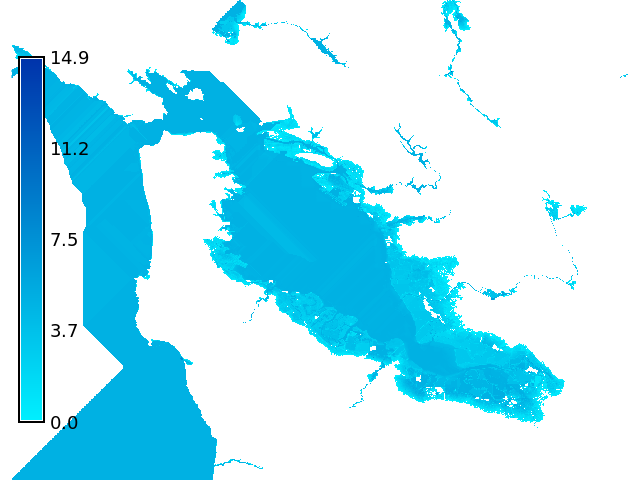

In [28]:
gs.run_command('d.erase')
# gs.run_command('d.rast', map="usgs_ned")
# gs.run_command('d.rast', map="streams")
gs.run_command("d.rast", map="flood")
gs.run_command('d.legend', raster="flood")
Image(filename="map.png")

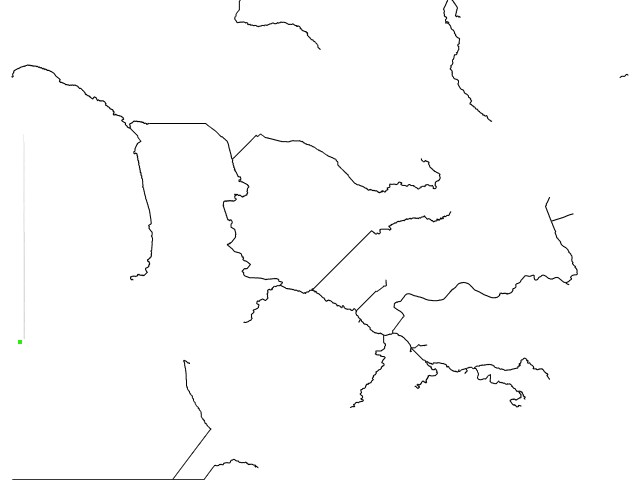

In [31]:
gs.run_command('d.erase')
# gs.run_command('d.rast', map="usgs_ned")
# gs.run_command('d.rast', map="streams")
gs.run_command("d.vect", map="streams")
gs.run_command('d.legend', raster="streams")
Image(filename="map.png")

### Export flood results from GRASS


In [47]:
gs.run_command("r.out.gdal", input="flood", output="flood.tif", format="GTiff" )


0

## Upload the classified image to Earth Engine

Upload the image to Earth Engine directly from the Cloud Storage bucket with the [`earthengine` command](https://developers.google.com/earth-engine/command_line#upload).  Provide both the image TFRecord file and the JSON file as arguments to `earthengine upload`.

In [63]:
!gsutil cp flood.tif gs://gee_default/

# !GCS_BUCKET_NAME="gee_default"
# !gsutil cp gs://gee_default/grass_elev_demo_.tif /content/grass_elev_demo.tif

Copying file://flood.tif [Content-Type=image/tiff]...
ResumableUploadAbortException: 400 Invalid bucket name: '{GCS_BUCKET_NAME}'


In [73]:
# REPLACE WITH YOUR USERNAME:
USER_NAME = 'ctwhite'
outputAssetID = 'users/' + USER_NAME + '/grassdata'
print('Writing to ' + outputAssetID)

Writing to users/ctwhite/grassdata


In [75]:
# Start the upload.
!earthengine upload image --help 
!earthengine upload image --asset_id=users/ctwhite/grassdata/flood gs://gee_default/flood.tif



usage: earthengine upload image [-h] [--wait [WAIT]] [--force]
                                [--asset_id ASSET_ID] [--last_band_alpha]
                                [--nodata_value NODATA_VALUE]
                                [--pyramiding_policy PYRAMIDING_POLICY]
                                [--bands BANDS] [--crs CRS]
                                [--manifest MANIFEST] [--property PROPERTY]
                                [--time_start TIME_START]
                                [--time_end TIME_END]
                                [src_files [src_files ...]]

Uploads an image from Cloud Storage to Earth Engine. See docs for "asset set"
for additional details on how to specify asset metadata properties.

positional arguments:
  src_files             Cloud Storage URL(s) of the file(s) to upload. Must
                        have the prefix 'gs://'.

optional arguments:
  -h, --help            show this help message and exit
  --wait [WAIT], -w [WAIT]
                      